<a href="https://colab.research.google.com/github/211fa07077/MACHINE-LEARNING-MODELS/blob/main/autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# encoder model preparation
x = Input(shape=(784,))
encode1 = Dense(500, activation='relu')(x)
encode2 = Dense(400,activation='relu')(encode1)
z=Dense(300,activation='relu')(encode2) # here we got reduce dim image z

# decoder model preparation
decoded1 = Dense(100, activation='sigmoid')(z)
decoded2 = Dense(300, activation='sigmoid')(decoded1)
xhat = Dense(784, activation='sigmoid')(decoded2)# here we got re constructed image xhat from z
# now we create a complete autoencoder model where x is given as input and xhat is produced as re constructed image from z
# this model has to train such that the x and xhat has to be very close to each other or the error between x and xhat should be too low
autoencoder = Model(x, xhat)

In [ ]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 400)               200400    
                                                                 
 dense_14 (Dense)            (None, 300)               120300    
                                                                 
 dense_15 (Dense)            (None, 100)               30100     
                                                                 
 dense_16 (Dense)            (None, 300)               30300     
                                                                 
 dense_17 (Dense)            (None, 784)               235

In [ ]:
# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model on training set for this load the data and reshape it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

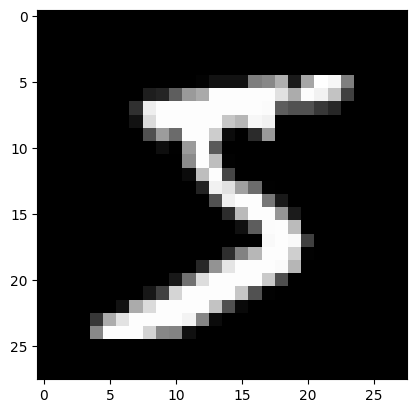

In [ ]:
# look at one sample
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
history=autoencoder.fit(x_train, x_train,epochs=15,batch_size=256,validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 3s 7ms/step - loss: 0.2740 - accuracy: 0.0114 - val_loss: 0.2508 - val_accuracy: 0.0125
Epoch 2/15
235/235 [==============================] - 1s 6ms/step - loss: 0.2448 - accuracy: 0.0108 - val_loss: 0.2407 - val_accuracy: 0.0099
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.2300 - accuracy: 0.0119 - val_loss: 0.2114 - val_accuracy: 0.0121
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1914 - accuracy: 0.0100 - val_loss: 0.1769 - val_accuracy: 0.0105
Epoch 5/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1701 - accuracy: 0.0094 - val_loss: 0.1579 - val_accuracy: 0.0125
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1521 - accuracy: 0.0128 - val_loss: 0.1443 - val_accuracy: 0.0102
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1410 - accuracy: 0.0106 - val_loss: 0.1350 - val_accuracy: 0.0093
Epoch 

313/313 [==============================] - 1s 2ms/step


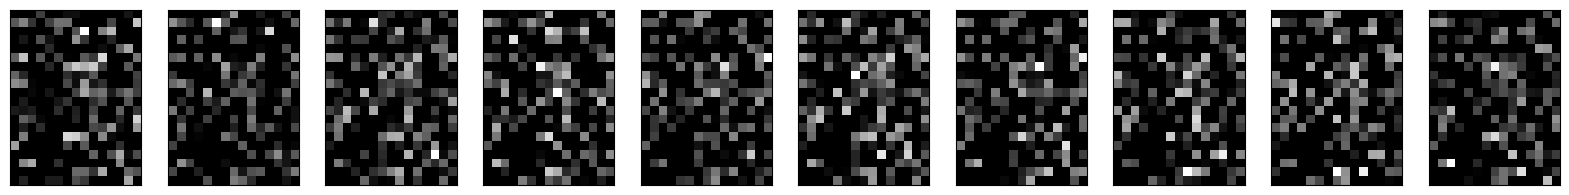

In [ ]:
# to see the encoded images we build another model with input x and output z(bottle neck layer)
# reduced dimensional images
encoder = Model(x, z)
encoded_imgs = encoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(15,20 ).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoder=Model(z,xhat)
xhat_imags=decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


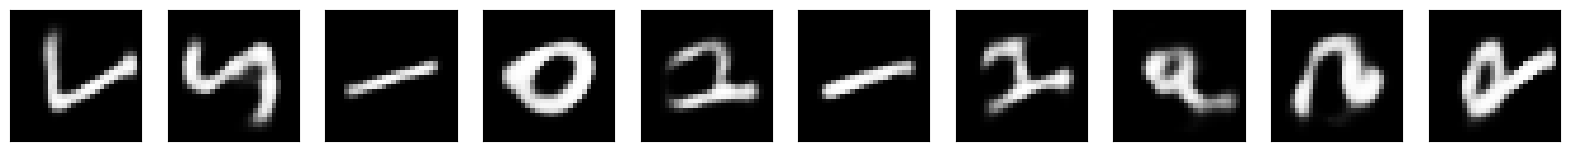

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(xhat_imags[i].reshape(28,28 ).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

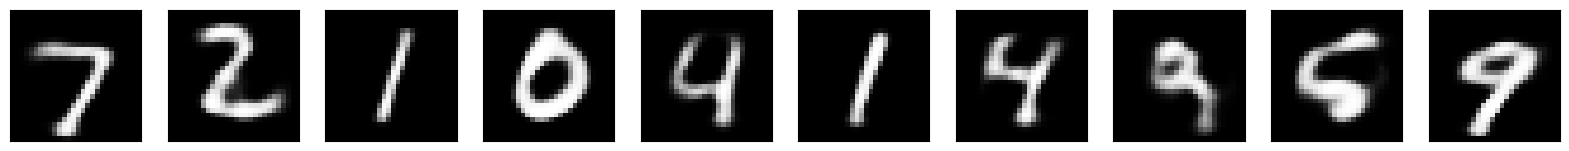

In [ ]:
# decoder generated model
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


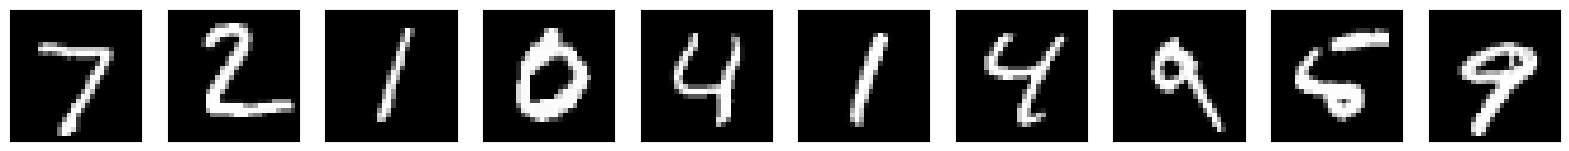

In [ ]:
# original images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# here we are testing the lost between original and decoded images
autoencoder.evaluate(x_test,decoded_imgs)

313/313 [==============================] - 1s 4ms/step - loss: 0.1116 - accuracy: 1.0000


[0.111637182533741, 1.0]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


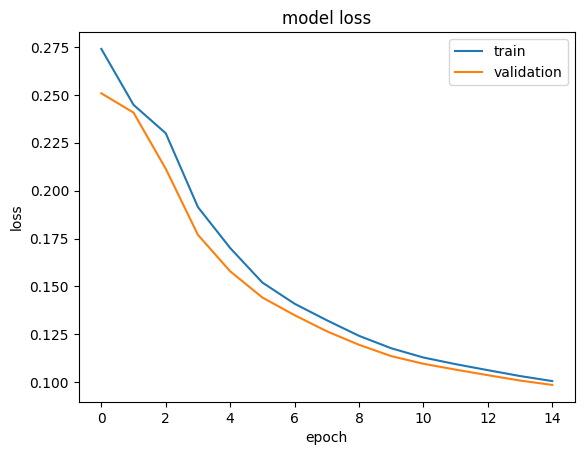

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# **autoencoder using convolution and deconvolution**

In [ ]:
x = Input(shape=(28, 28,1))
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
z = MaxPooling2D((2, 2), padding='same')(conv1_3)
# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(z)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
xhat = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)
autoencoder_cnn = Model(inputs=x, outputs=xhat)

In [ ]:
autoencoder_cnn.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584

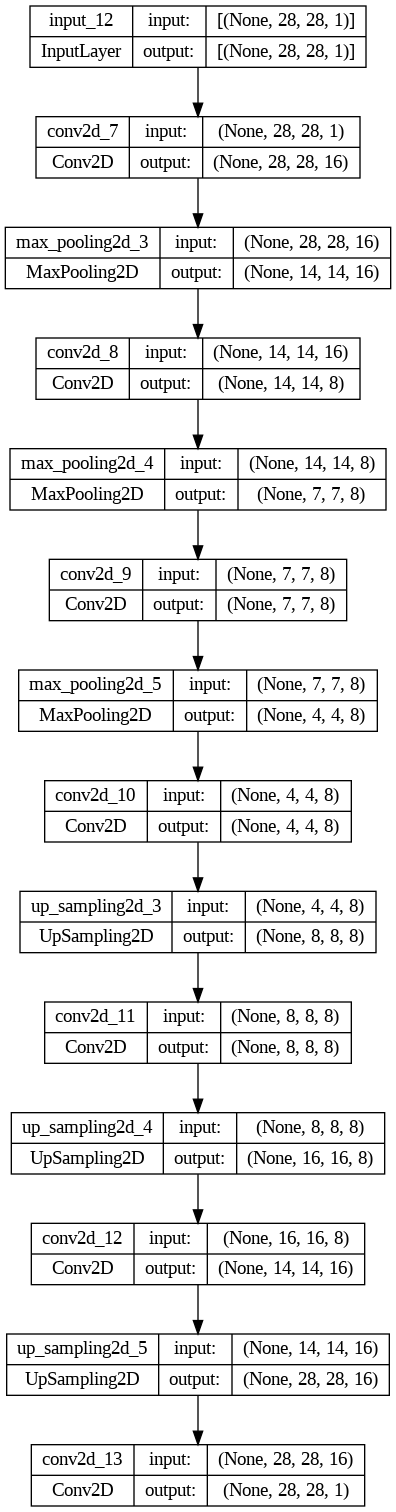

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder_cnn,show_shapes=True)

In [ ]:
autoencoder_cnn.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras import utils

In [ ]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
history=autoencoder_cnn.fit(X_train, X_train,epochs=15,batch_size=256,validation_data=(X_test, X_test))

Epoch 1/15
235/235 [==============================] - 10s 12ms/step - loss: 0.2729 - val_loss: 0.1738
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1605 - val_loss: 0.1492
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1430 - val_loss: 0.1360
Epoch 4/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1327 - val_loss: 0.1279
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1259 - val_loss: 0.1220
Epoch 6/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1206 - val_loss: 0.1170
Epoch 7/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1165 - val_loss: 0.1137
Epoch 8/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1135 - val_loss: 0.1112
Epoch 9/15
235/235 [==============================] - 2s 9ms/step - loss: 0.1113 - val_loss: 0.1092
Epoch 10/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1094 - val_loss: 0.10

In [ ]:
encoder_cnn = Model(x, z)
encoded_imgs = encoder_cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


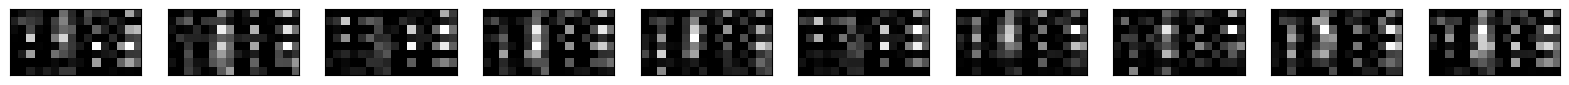

In [ ]:
# to see the encoded images we build another model with input x and output z(bottle neck layer)
# reduced dimensional images

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(8,16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoder=Model(z,xhat)
xhat_imags=decoder.predict(encoded_imgs)


313/313 [==============================] - 1s 3ms/step


In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


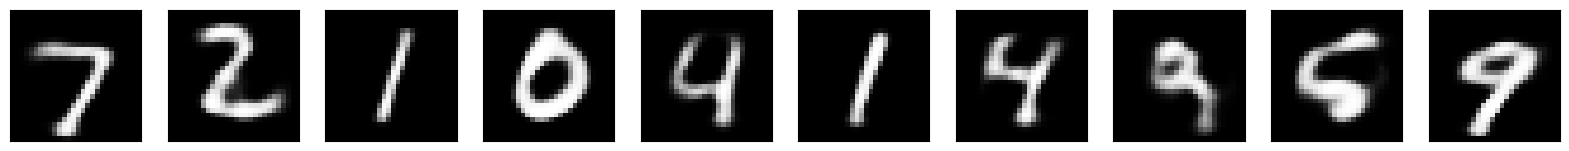

In [ ]:
# decoder generated model
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


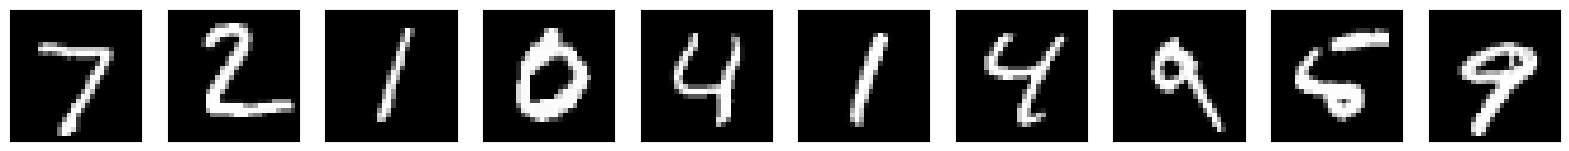

In [ ]:
# original images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()